In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Compute quantities required for feature-wise normalization
datagen.fit(x_train)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


c:\Users\realh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [3]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
batch_size = 64
epochs = 50

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    verbose=2
)


Epoch 1/50


c:\Users\realh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 - 171s - 219ms/step - accuracy: 0.4262 - loss: 1.7008 - val_accuracy: 0.5413 - val_loss: 1.2383
Epoch 2/50


c:\Users\realh\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 - 7s - 8ms/step - accuracy: 0.5625 - loss: 1.2901 - val_accuracy: 0.5569 - val_loss: 1.2005
Epoch 3/50
781/781 - 170s - 217ms/step - accuracy: 0.5746 - loss: 1.1914 - val_accuracy: 0.5416 - val_loss: 1.4311
Epoch 4/50
781/781 - 7s - 9ms/step - accuracy: 0.5781 - loss: 1.3294 - val_accuracy: 0.5350 - val_loss: 1.4626
Epoch 5/50
781/781 - 187s - 240ms/step - accuracy: 0.6390 - loss: 1.0171 - val_accuracy: 0.6382 - val_loss: 1.0730
Epoch 6/50
781/781 - 10s - 12ms/step - accuracy: 0.8125 - loss: 0.5390 - val_accuracy: 0.6431 - val_loss: 1.0577
Epoch 7/50
781/781 - 169s - 216ms/step - accuracy: 0.6754 - loss: 0.9179 - val_accuracy: 0.6636 - val_loss: 1.0187
Epoch 8/50
781/781 - 7s - 9ms/step - accuracy: 0.7031 - loss: 0.7986 - val_accuracy: 0.6719 - val_loss: 0.9822
Epoch 9/50
781/781 - 166s - 212ms/step - accuracy: 0.7025 - loss: 0.8543 - val_accuracy: 0.7254 - val_loss: 0.8224
Epoch 10/50
781/781 - 7s - 9ms/step - accuracy: 0.6719 - loss: 0.8736 - val_accuracy: 0.7242 - val_loss: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8600 - loss: 0.4232
Test loss: 0.41832470893859863
Test accuracy: 0.8598999977111816


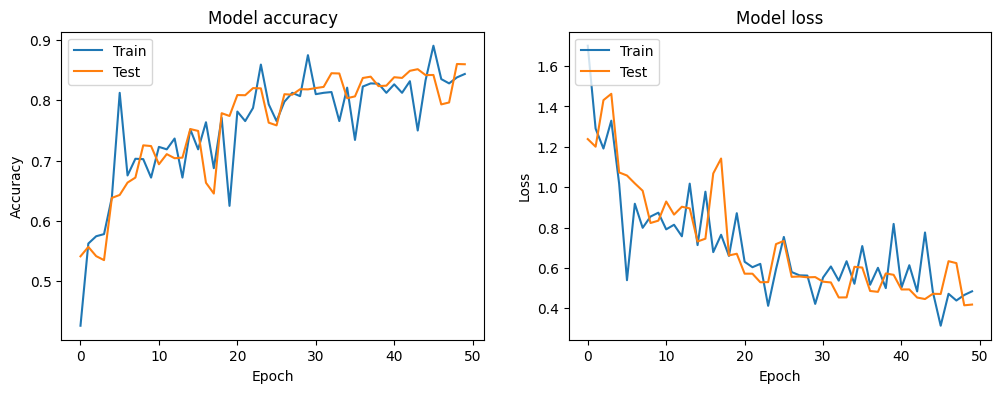

In [4]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    verbose=2,
    callbacks=[early_stopping]
)



Epoch 1/50
781/781 - 270s - 345ms/step - accuracy: 0.8681 - loss: 0.3837 - val_accuracy: 0.8760 - val_loss: 0.3650
Epoch 2/50
781/781 - 14s - 18ms/step - accuracy: 0.8750 - loss: 0.4227 - val_accuracy: 0.8758 - val_loss: 0.3664
Epoch 3/50
781/781 - 250s - 320ms/step - accuracy: 0.8667 - loss: 0.3838 - val_accuracy: 0.8746 - val_loss: 0.3803
Epoch 4/50
781/781 - 15s - 19ms/step - accuracy: 0.8438 - loss: 0.4593 - val_accuracy: 0.8760 - val_loss: 0.3762
Epoch 5/50
781/781 - 260s - 333ms/step - accuracy: 0.8699 - loss: 0.3744 - val_accuracy: 0.8590 - val_loss: 0.4318
Epoch 6/50
781/781 - 15s - 19ms/step - accuracy: 0.8281 - loss: 0.4745 - val_accuracy: 0.8586 - val_loss: 0.4359
Epoch 7/50
781/781 - 236s - 302ms/step - accuracy: 0.8678 - loss: 0.3803 - val_accuracy: 0.8733 - val_loss: 0.3795
Epoch 8/50
781/781 - 14s - 18ms/step - accuracy: 0.9219 - loss: 0.3170 - val_accuracy: 0.8722 - val_loss: 0.3821
Epoch 9/50
781/781 - 233s - 299ms/step - accuracy: 0.8689 - loss: 0.3740 - val_accuracy: